In [1]:
import matplotlib
from matplotlib.colors import ListedColormap

from matplotlib import cm
import os, sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0,'..')
from analysis.analysis_utils import *
pltcolors, pltcolors_alt = steffiscolours()



### Simulation

In [2]:
# Generate plot through simulation. Borders can also be calculated analytically
# so there likely is a more efficient way to generate this plot

dt = .1 # time step in ms
stim_len = 200 # stimulus time in ms
trial_len = 6000 # simulation time in ms
n_stim = 4 # number of stimuli

t = np.arange(0,trial_len, dt)
orders = np.array([[3,1,2],[1,3,2],[3,2,1],[2,3,1],[1,2,3],[2,1,3]])
freqs = np.arange(0.1,10,0.01) #frequencies
isis = np.arange(0,300,1) #interstimulus intervals
result = np.zeros((len(isis),len(freqs)))
add_offs = 0

for x, isi in enumerate(isis):
    for y, freq in enumerate(freqs):

        delay_start = int((stim_len*n_stim+isi*(n_stim-1))/dt)
        delay_end =delay_start + int(1000/(freq*dt))
        sine = np.sin((t/1000)*freq*np.pi*2)
        pred_current = np.zeros((n_stim ,len(t)))
        start = 0
        for i in range(n_stim):
            pred_current[i,start:]=sine[:len(pred_current[i,start:])]
            start += int((stim_len+isi+add_offs*i)/dt)
        phase_order = np.argsort(np.argmax(pred_current[:,delay_start:delay_end], axis = 1))
        while phase_order[0]!=0:
            phase_order = np.roll(phase_order, 1)
        phase_order = phase_order[1:]
        index = np.where((phase_order==orders).all(axis=1))
        result[x,y] = index[0][0]

### Create plot

[0.5 1.5 2.5 3.5 4.5]


/opt/homebrew/Caskroom/miniforge/base/envs/PhaseC/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


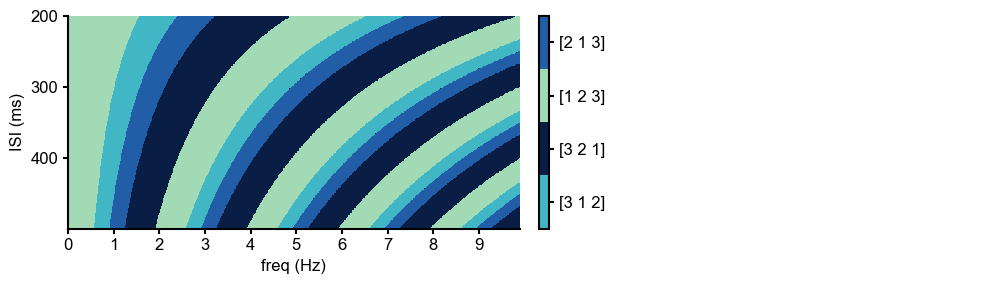

In [3]:
col_dict={1:pltcolors_alt[1],
          2:pltcolors_alt[3],
          3:pltcolors_alt[0],
          4:pltcolors_alt[2]}
# create a colormap
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

#  description of each category
labels = np.array([orders[0],orders[2],orders[4],orders[5]])
len_lab = len(labels)


norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
print(norm_bins)

norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
fig = plt.figure(figsize = (10,3))
gs = fig.add_gridspec(1, 3, width_ratios=[3.5, 0.5,1.5])  # , left=0, right=1,

res4 = np.copy(result)
res4+=.5
res4[result>1]-=1
res4[result>2]-=1
ax=[[],[]]
ax[0] = fig.add_subplot(gs[0])
ax[1] = fig.add_subplot(gs[2])

im = ax[0].imshow(res4, cmap=cm, norm=norm,aspect='auto')

ax[0].set_xticks(np.arange(len(freqs))[::100])
ax[0].set_xticklabels(["{:.0f}".format(fr) for fr in freqs[::100]])
ax[0].set_xlabel("freq (Hz)")
ax[0].set_yticks(np.arange(len(isis))[::100])
ax[0].set_yticklabels(["{:.0f}".format(isi+200) for isi in isis[::100]])
ax[0].set_ylabel("ISI (ms)")
ax[1].axis('off')
diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = plt.colorbar(im, format=fmt, ticks=tickz,fraction=0.024, pad=0.04,ax = ax[0])
fig.tight_layout()


plt.show()
